# Bibliotecas

In [15]:
from metapy_toolbox import *
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
from joblib import Parallel, delayed
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update({
                        'font.family': 'serif',
                        'mathtext.fontset': 'cm',
                        'axes.unicode_minus': False
                    })
from fundacao import *

# Carregando dados

In [16]:
# df = pd.read_excel(r"/home/wmpjrufg/Documents/fundaIA/assets/toy_problem.xlsx") # Prof. Wanderlei
# df = pd.read_excel(r"C:\git-projetos\fundaIA\assets\toy_problem_copy.xlsx") # Prof. Wanderlei casa
# df = pd.read_excel(r"C:\git-projetos\fundaIA\assets\toy_problem_copy_2.xlsx") # Prof. Wanderlei casa
# df = pd.read_excel(r"C:\git-projetos\fundaIA\assets\toy_problem_copy_3.xlsx") # Prof. Wanderlei casa
df = pd.read_excel(r"assets\el08.xlsx")
df = pd.read_excel(r"assets\problema_brinquedo.xlsx")
n_comb = 3
f_ck = 25000
cob_m = 0.04
df

,Elemento,ap (m),bp (m),spt,solo,xg (m),yg (m),Fz-c1,Mx-c1,My-c1,Fz-c2,Mx-c2,My-c2,Fz-c3,Mx-c3,My-c3
0,P04,0.30,1.5,35,argila,32.10,20.370,855.5,-3.7,9.2,891.9,-60.0,0.6,908.5,-36.9,0.4
1,P05,0.25,1.2,45,argila,35.30,20.370,478.6,-3.1,5.0,496.0,-27.6,0.7,508.0,-27.6,0.7
2,P16,0.25,1.2,43,argila,27.75,18.065,377.3,-1.9,4.4,259.2,-27.8,0.1,383.8,27.7,0.2


# Pop inicial de possíveis soluções

In [17]:
n_population = 200
seed = 42

In [18]:
x_lower = [0.60] * len(df) * 3
x_upper = [5.00] * len(df) * 3
n_dimensions = len(df) * 3
pop2d = initial_population_01(n_population, n_dimensions, x_lower, x_upper, seed, use_lhs=True)

# Gerando dataset completo

In [19]:
cols = []
for i in range(len(df)):
    cols.append(f'hx{i}')
    cols.append(f'hy{i}')
    cols.append(f'hz{i}')
df_pop = pd.DataFrame(pop2d, columns=cols)
args = [df, n_comb, f_ck, cob_m]
def wrapper(x):
    return obj_teste(x, args)[0]
vol = Parallel(n_jobs=-1)(delayed(wrapper)(x) for x in pop2d)
df_pop['volume (m3)'] = vol
df_pop

,hx0,hy0,hz0,hx1,hy1,hz1,hx2,hy2,hz2,volume (m3)
0,4.850973,1.052345,3.023111,3.444658,2.335928,1.194536,4.191255,2.782707,0.839182,42.343024
1,3.384092,4.639842,0.953611,2.411835,1.153899,3.406245,4.115001,0.873799,2.578596,40.160563
2,2.517792,4.348103,4.037322,3.386200,0.886645,1.042351,0.780876,3.345718,3.031732,59.527212
3,4.229036,3.852606,2.916973,4.389615,2.448715,3.804832,4.331850,0.809670,1.013832,101.093211
4,4.843142,2.305534,2.201008,1.839264,4.638383,1.175681,1.002594,1.671128,1.813690,38.318425
...,...,...,...,...,...,...,...,...,...,...
195,2.083271,4.182897,2.228608,3.484136,2.647718,1.032692,4.182279,4.093341,3.766020,93.419289
196,1.433358,1.214431,4.626224,1.214371,1.235084,1.769800,2.787235,0.912963,3.138120,30.200917
197,1.328592,1.135954,4.020513,2.124320,3.032157,4.354387,4.219712,3.236266,3.310475,88.149975
198,1.870265,0.816622,0.814580,2.099474,0.988736,0.672907,3.617159,1.170290,0.979169,21.917859


In [20]:
oi = df_pop.sort_values(by="volume (m3)", ascending=True)
oi

,hx0,hy0,hz0,hx1,hy1,hz1,hx2,hy2,hz2,volume (m3)
159,3.666531,1.325226,0.794534,0.705472,4.890534,2.091189,1.028653,3.681404,1.832502,20.513484
15,3.701498,2.228912,0.611389,0.978780,3.986180,2.591294,0.743204,1.833368,4.437422,21.200610
198,1.870265,0.816622,0.814580,2.099474,0.988736,0.672907,3.617159,1.170290,0.979169,21.917859
56,3.338554,2.100403,1.649082,0.933578,1.337129,3.567451,4.624415,1.593476,1.148778,25.006316
11,2.954838,1.020011,1.992606,1.980151,1.304678,2.276867,3.312228,1.272114,1.782011,25.789731
...,...,...,...,...,...,...,...,...,...,...
189,4.318348,4.904255,3.885959,2.987573,3.834294,2.951936,4.462928,2.098738,3.585751,152.110143
149,2.914159,1.579401,3.447583,4.494393,4.876641,4.572650,3.803860,2.416812,4.425395,159.670624
82,4.463329,4.946835,4.273963,3.017534,2.517019,4.449973,1.292820,4.989231,4.684672,160.788771
17,2.039811,4.403611,1.179211,3.233813,4.611493,4.258006,4.675090,4.799630,4.363848,172.009758


# Aprendizado de máquina do dataset

### Separação em x e y

In [21]:
x = df_pop.drop(columns=['volume (m3)'])
y = df_pop[['volume (m3)']].reset_index(drop=True)
y

,volume (m3)
0,42.343024
1,40.160563
2,59.527212
3,101.093211
4,38.318425
...,...
195,93.419289
196,30.200917
197,88.149975
198,21.917859


### Treinamento com adição de amostras

In [22]:
x_treino, x_teste, y_treino, y_teste= train_test_split(x, y, test_size=0.30, random_state=seed)
df_gpr = aprendizado_maquina_paralelo(x_treino, y_treino, x_teste, y_teste)

#### Gráficos

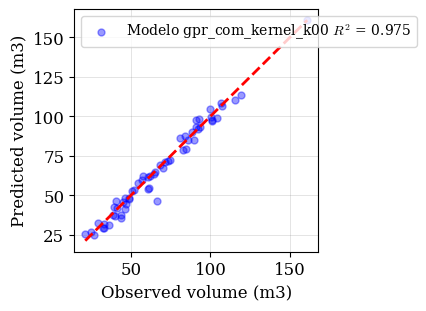

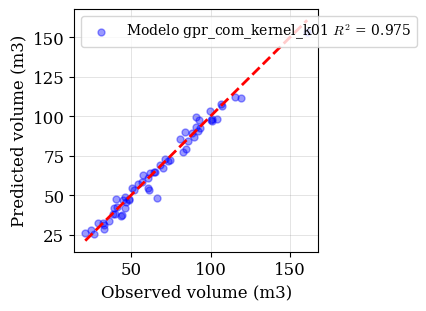

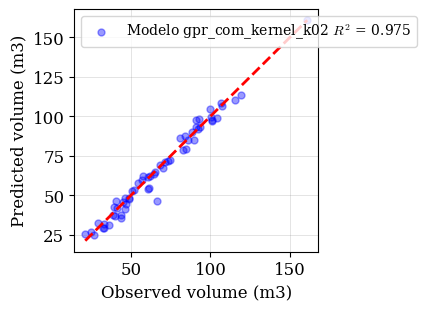

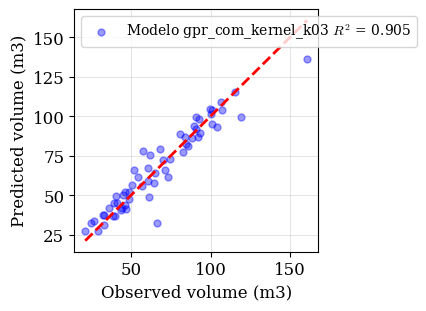

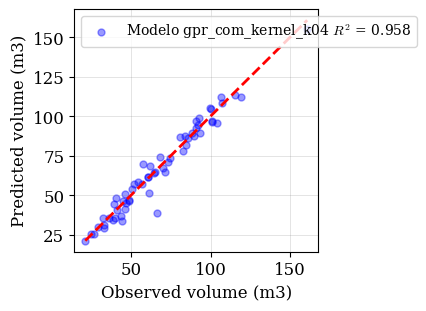

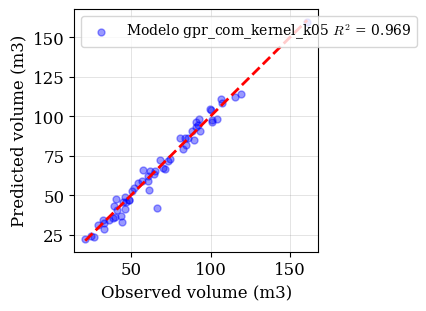

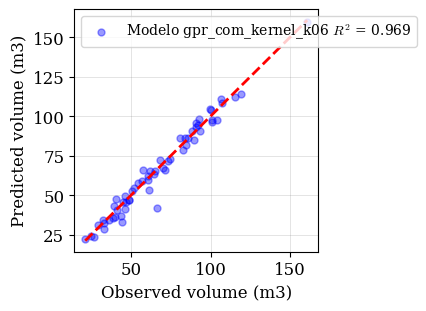

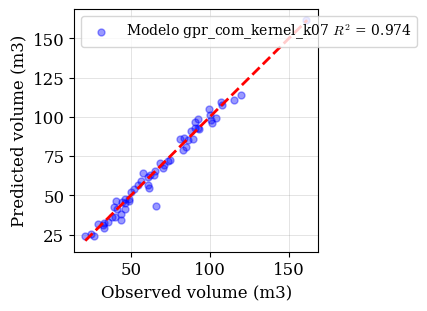

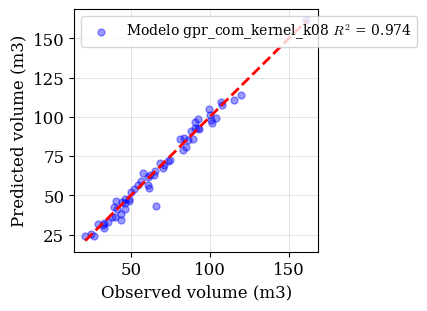

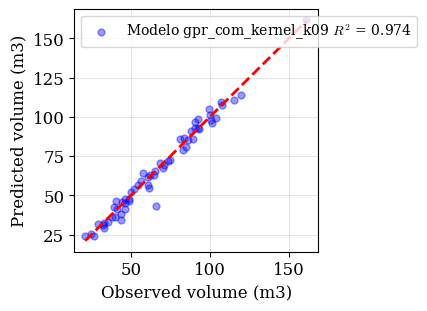

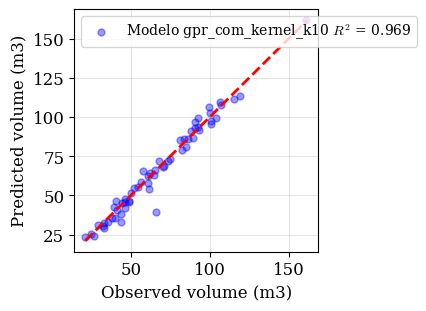

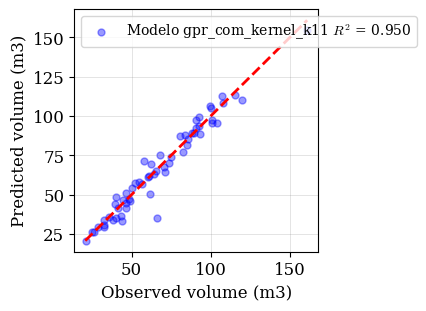

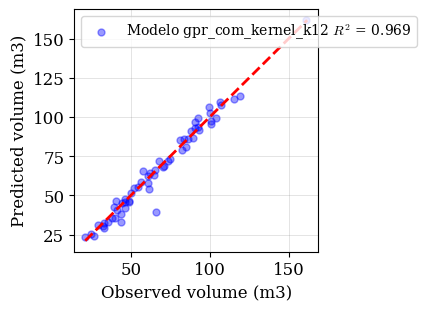

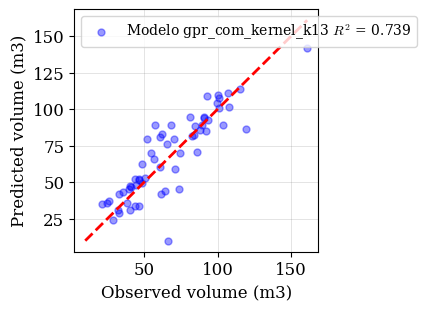

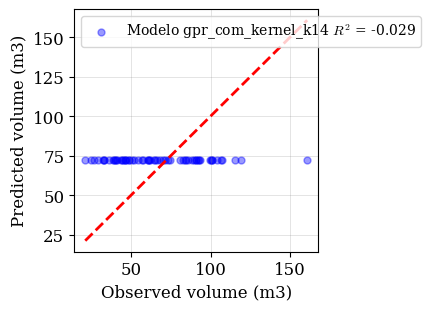

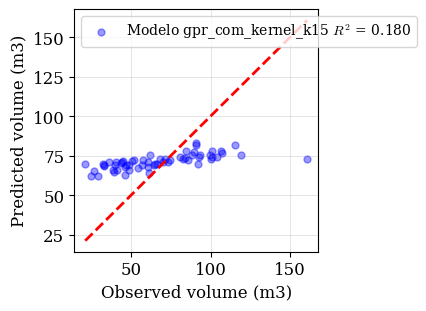

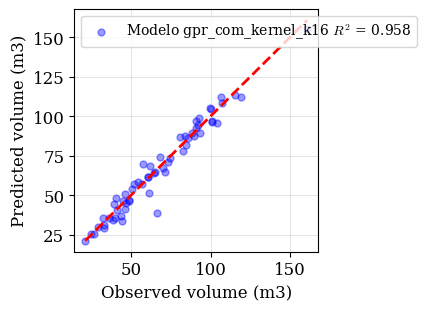

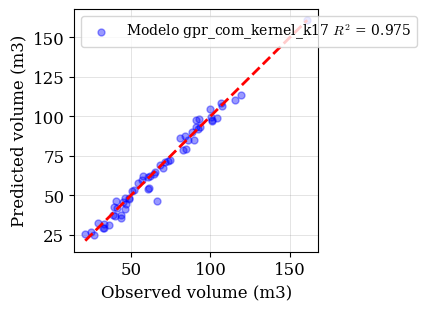

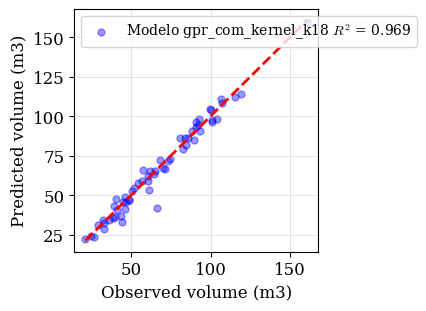

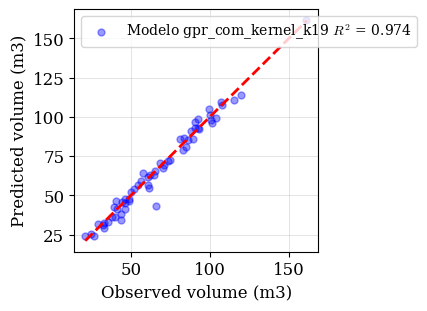

In [23]:
for i in range(len(df_gpr)):
    ### Figure name and DPI
    dpi = 600                                                    # Change as you wish
    name = f'GPR_{df_gpr[i]["modelo"]}_com_{len(x_treino)}_amostras'
    data = pd.DataFrame({
                            "Observed": list(df_gpr[i]["y_obse"]['volume (m3)']),
                            "Predicted": list(df_gpr[i]["y_pred"]['volume (m3)'])
                        })                          # Change as you wish

    ### Chart dimensions (in centimeters)
    b_cm = 8                                                    # Change as you wish
    h_cm = 8                                                    # Change as you wish
    inches_to_cm = 1 / 2.54
    b_input = b_cm * inches_to_cm
    h_input = h_cm * inches_to_cm

    ### Axis and labels (For LateX font format use the dollar sign $)
    label_x = 'Observed volume (m3)'                                        # Change as you wish
    label_y = 'Predicted volume (m3)'                                       # Change as you wish
    size_label = 12                                             # Change as you wish
    color_label = 'black'                                       # or hexadecimal. Change as you wish
    size_axis = 12                                              # Change as you wish
    color_axis = 'black'                                        # or hexadecimal. Change as you wish

    ### Line
    size_line = 2                                               # Change as you wish
    style_line = '--'                                            # Change as you wish
    color_line = 'red'                                          # or hexadecimal. Change as you wish

    ### Scatter
    alpha_scatter = 0.4                                             # Change as you wish
    color_scatter = 'blue'                                          # Change as you wish
    size_scatter = 25                                               # Change as you wish

    ### Legend
    labels_legend = f'Modelo {df_gpr[i]["modelo"]} $R^2$ = {df_gpr[i]["R2_Teste"]:.3f}'                         # Change as you wish
    size_legend = 10                                            # Change as you wish
    location_legend = 'upper left'                              # Change as you wish - 'best' look up by the best fit

    ### Grid
    on_or_off = True
    line_width_grid = 0.5                                       # Change as you wish
    alpha_grid = 0.3                                            # Change as you wish
    style_grid = '-'                                            # Change as you wish
    color_grid = 'gray'                                         # or hexadecimal. Change as you wish

    ### Max and min axis limits
    lims = [
                min(data.min()),
                max(data.max())
            ]   

    ### Figure
    fig, ax = plt.subplots(figsize=(b_input, h_input))
    ax.tick_params(axis='both', which='major', labelsize=size_axis, colors=color_axis)
    ax.set_xlabel(label_x, fontsize=size_label, color=color_label)
    ax.set_ylabel(label_y, fontsize=size_label, color=color_label)

    ### Title. Do you need a title? Use the cell bellow:
    # ax.set_title('Sine Wave Plot', fontsize=16)

    ### Config grid
    plt.grid(on_or_off, which='both', linestyle=style_grid, linewidth=line_width_grid, color=color_grid, alpha=alpha_grid)

    ### Plot data and legend
    ax.plot(lims, lims, linewidth=size_line, linestyle=style_line, color=color_line,)
    ax.scatter(data["Observed"], data["Predicted"], alpha=alpha_scatter, color=color_scatter, s=size_scatter, label=labels_legend)
    ax.legend(fontsize=size_legend, loc=location_legend)

    ### Save. Do you need save? Use the cell bellow:
    fig.savefig(f'z_{name}.png', dpi=dpi, bbox_inches='tight')
    plt.show()

In [24]:
x_treino, x_teste, y_treino, y_teste= train_test_split(x, y, test_size=0.20, random_state=seed)
print("Quantidade de amostras no treino", len(x_treino))
df_gpr = aprendizado_maquina_paralelo(x_treino, y_treino, x_teste, y_teste)

Quantidade de amostras no treino 160


#### Gráficos

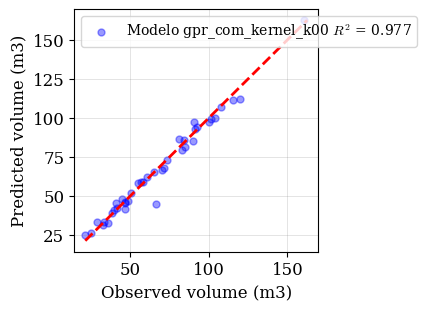

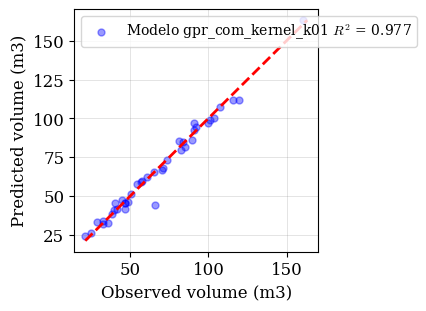

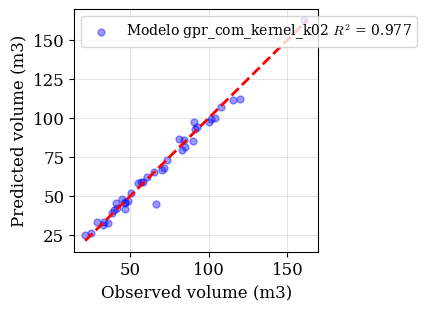

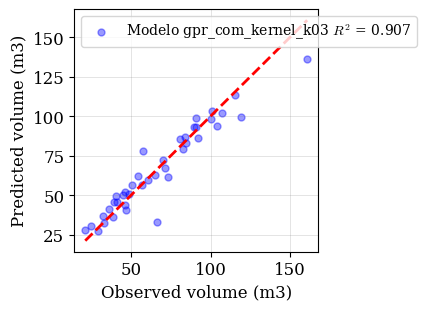

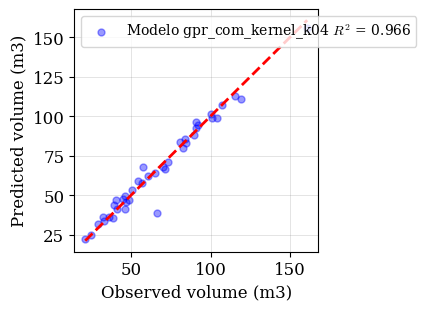

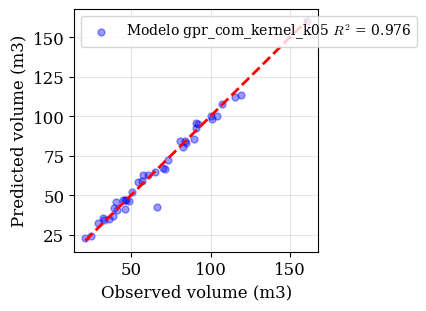

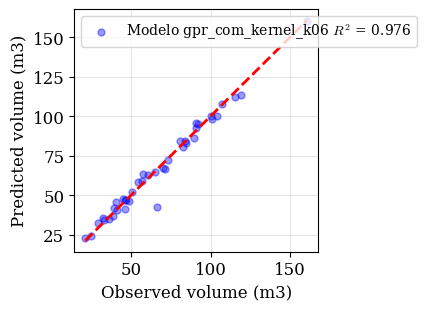

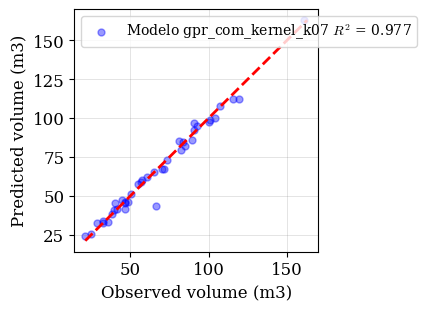

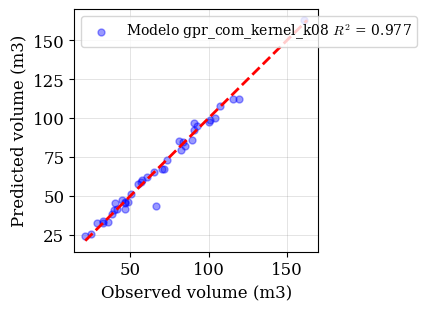

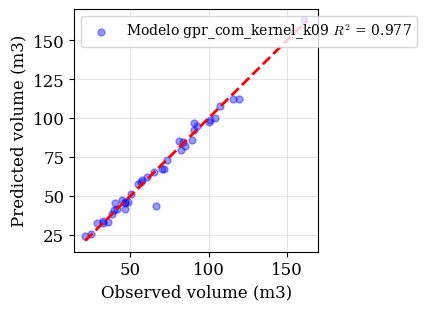

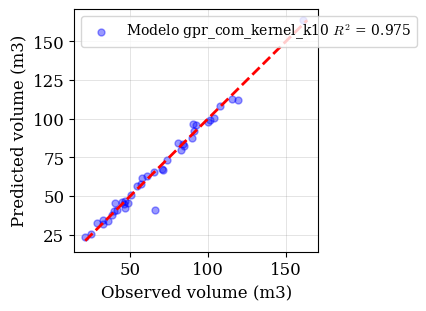

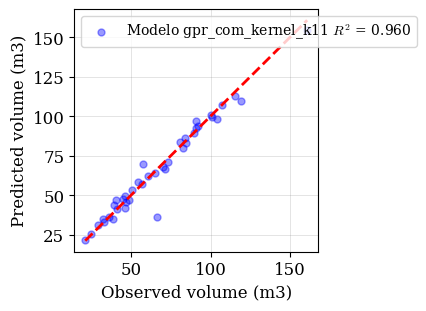

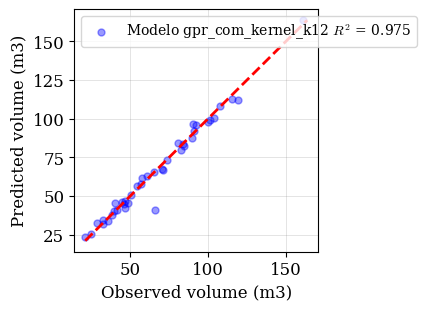

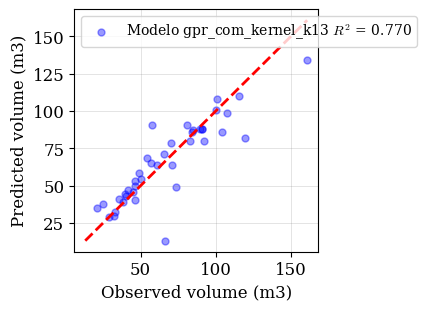

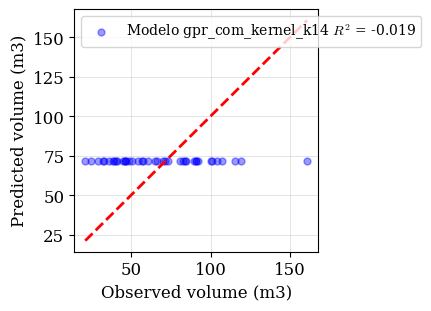

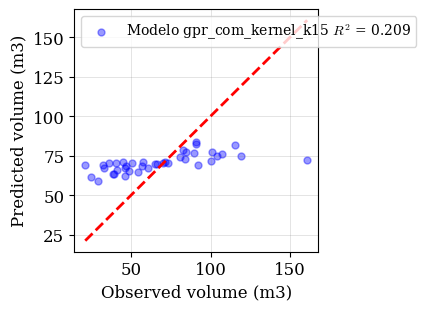

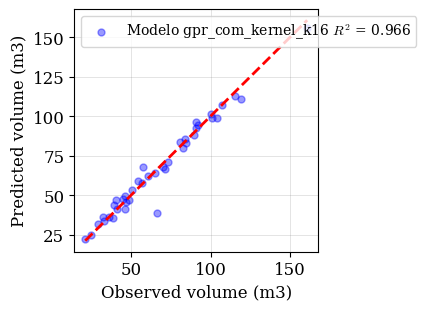

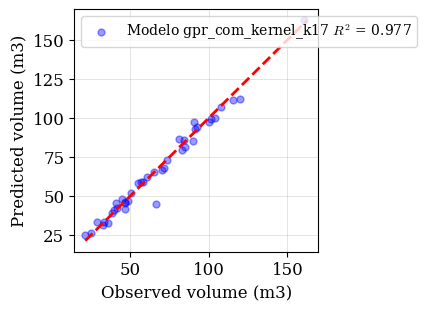

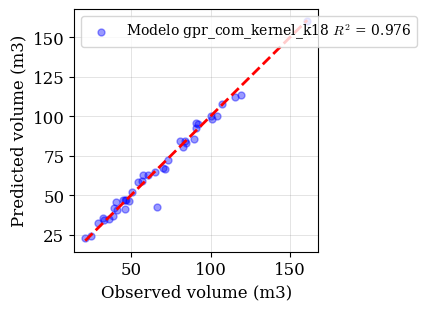

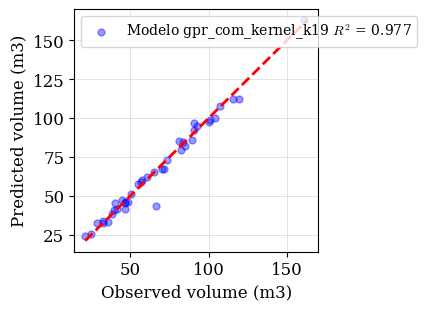

In [25]:
for i in range(len(df_gpr)):
    ### Figure name and DPI
    dpi = 600                                                    # Change as you wish
    name = f'GPR_{df_gpr[i]["modelo"]}_com_{len(x_treino)}_amostras'
    data = pd.DataFrame({
                        "Observed": list(df_gpr[i]["y_obse"]['volume (m3)']),
                        "Predicted": list(df_gpr[i]["y_pred"]['volume (m3)'])
                    })                          # Change as you wish

    ### Chart dimensions (in centimeters)
    b_cm = 8                                                    # Change as you wish
    h_cm = 8                                                    # Change as you wish
    inches_to_cm = 1 / 2.54
    b_input = b_cm * inches_to_cm
    h_input = h_cm * inches_to_cm

    ### Axis and labels (For LateX font format use the dollar sign $)
    label_x = 'Observed volume (m3)'                                        # Change as you wish
    label_y = 'Predicted volume (m3)'                                       # Change as you wish
    size_label = 12                                             # Change as you wish
    color_label = 'black'                                       # or hexadecimal. Change as you wish
    size_axis = 12                                              # Change as you wish
    color_axis = 'black'                                        # or hexadecimal. Change as you wish

    ### Line
    size_line = 2                                               # Change as you wish
    style_line = '--'                                            # Change as you wish
    color_line = 'red'                                          # or hexadecimal. Change as you wish

    ### Scatter
    alpha_scatter = 0.4                                             # Change as you wish
    color_scatter = 'blue'                                          # Change as you wish
    size_scatter = 25                                               # Change as you wish

    ### Legend
    labels_legend = f'Modelo {df_gpr[i]["modelo"]} $R^2$ = {df_gpr[i]["R2_Teste"]:.3f}'                         # Change as you wish
    size_legend = 10                                            # Change as you wish
    location_legend = 'upper left'                              # Change as you wish - 'best' look up by the best fit

    ### Grid
    on_or_off = True
    line_width_grid = 0.5                                       # Change as you wish
    alpha_grid = 0.3                                            # Change as you wish
    style_grid = '-'                                            # Change as you wish
    color_grid = 'gray'                                         # or hexadecimal. Change as you wish

    ### Max and min axis limits
    lims = [
                min(data.min()),
                max(data.max())
            ]   

    ### Figure
    fig, ax = plt.subplots(figsize=(b_input, h_input))
    ax.tick_params(axis='both', which='major', labelsize=size_axis, colors=color_axis)
    ax.set_xlabel(label_x, fontsize=size_label, color=color_label)
    ax.set_ylabel(label_y, fontsize=size_label, color=color_label)

    ### Title. Do you need a title? Use the cell bellow:
    # ax.set_title('Sine Wave Plot', fontsize=16)

    ### Config grid
    plt.grid(on_or_off, which='both', linestyle=style_grid, linewidth=line_width_grid, color=color_grid, alpha=alpha_grid)

    ### Plot data and legend
    ax.plot(lims, lims, linewidth=size_line, linestyle=style_line, color=color_line,)
    ax.scatter(data["Observed"], data["Predicted"], alpha=alpha_scatter, color=color_scatter, s=size_scatter, label=labels_legend)
    ax.legend(fontsize=size_legend, loc=location_legend)

    ### Save. Do you need save? Use the cell bellow:
    fig.savefig(f'z_{name}_pt.png', dpi=dpi, bbox_inches='tight')
    plt.show()

In [26]:
df_gpr[0]

{'modelo': 'gpr_com_kernel_k00',
 'arquivo': 'modelos\\gpr_com_kernel_k00_pop_160.pkl',
 'R2_Treino': 1.0,
 'R2_Teste': 0.9769804964958774,
 'MAE': 3.074009166346937,
 'RMSE': 4.604418310803513,
 'y_obse':      volume (m3)
 95    103.890188
 15     21.200610
 30     89.524211
 158    35.852064
 128    90.590139
 115    39.599271
 69    100.043450
 170    38.416808
 174    57.693402
 45    119.448514
 66     46.424546
 182    32.470973
 165    82.691032
 78     73.395668
 186    80.872064
 177    40.530453
 56     25.006316
 152    44.647584
 82    160.788771
 68     50.349357
 124    71.211906
 16     54.614399
 148    65.258574
 93    101.046956
 65     66.123177
 60     56.748589
 84     32.853288
 67     83.913121
 125    84.783816
 132   115.456725
 9      90.819034
 18     46.379654
 55     60.664209
 75     41.392783
 150    46.541999
 104    28.975685
 135    48.735662
 137    70.360539
 164    92.309605
 76    107.405435,
 'y_pred':     volume (m3)
 0     99.823277
 1     24.75